<a href="https://colab.research.google.com/github/psgareja/Complete-Python-3-Bootcamp/blob/master/supervies_and_unsupervised_model_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


In [3]:
uploaded=files.upload()

Saving minisom.py to minisom.py


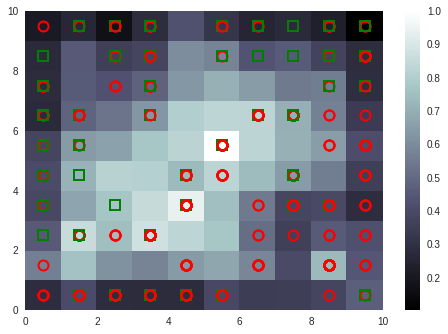

In [10]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#Finding the frauds
#mappings = som.win_map(X)
#frauds = np.concatenate((mappings[(7,6)], mappings[(9,1)]), axis = 0)
#frauds = sc.inverse_transform(frauds)
#frauds.reshape(1,-1)

In [0]:
#Finding the frauds
mappings = som.win_map(X)
frauds = mappings[(5,5)]
frauds = sc.inverse_transform(frauds)


In [14]:
frauds

array([[1.5648069e+07, 0.0000000e+00, 2.4500000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3200000e+02, 1.0000000e+00],
       [1.5731586e+07, 0.0000000e+00, 2.9500000e+01, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+01, 8.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.5600000e+02, 1.8000000e+01],
       [1.5575605e+07, 0.0000000e+00, 2.4750000e+01, 1.3665000e+01,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 2.0000000e+00],
       [1.5644453e+07, 0.0000000e+00, 1.8170000e+01, 1.0000000e+01,
        1.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [0]:
#Going unsupervised learning to supervised learning

In [0]:
customers=dataset.iloc[:,1:]

In [0]:
is_fraud=np.zeros(len(dataset))

In [18]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i]=1
    

In [20]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)


# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 10)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
Using TensorFlow backend.


Epoch 1/10
690/690 [==============================] - 1s 2ms/step - loss: 0.4584 - acc: 0.9797
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1576 - acc: 0.9797
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0817 - acc: 0.9797
Epoch 4/10
690/690 [==============================] - 1s 867us/step - loss: 0.0628 - acc: 0.9797
Epoch 5/10
690/690 [==============================] - 1s 877us/step - loss: 0.0523 - acc: 0.9797
Epoch 6/10
690/690 [==============================] - 1s 872us/step - loss: 0.0464 - acc: 0.9797
Epoch 7/10
690/690 [==============================] - 1s 874us/step - loss: 0.0419 - acc: 0.9797
Epoch 8/10
690/690 [==============================] - 1s 897us/step - loss: 0.0389 - acc: 0.9797
Epoch 9/10
690/690 [==============================] - 1s 882us/step - loss: 0.0364 - acc: 0.9797
Epoch 10/10
690/690 [==============================] - 1s 878us/step - loss: 0.0340 - acc: 0.9797


In [0]:
#proebility of the fraud

y_pred=classifier.predict(customers)

In [24]:
y_pred

array([[7.40157993e-05],
       [4.25263122e-02],
       [2.39776038e-02],
       [2.39913887e-03],
       [1.88606733e-04],
       [9.91257932e-03],
       [7.43538141e-04],
       [5.20960009e-03],
       [7.58961868e-03],
       [1.82754447e-04],
       [7.04755003e-05],
       [7.22091572e-05],
       [1.69217514e-04],
       [2.40503286e-05],
       [3.30414390e-04],
       [7.07889558e-04],
       [1.43666712e-05],
       [6.02600165e-04],
       [3.02417111e-03],
       [4.12905915e-03],
       [3.45018916e-02],
       [1.75144523e-03],
       [4.18563577e-04],
       [3.00832380e-05],
       [4.90211789e-03],
       [2.74757804e-05],
       [4.88147605e-03],
       [3.86701024e-04],
       [9.97634139e-04],
       [5.56855921e-05],
       [1.49904427e-05],
       [2.30355740e-01],
       [8.02145165e-04],
       [1.32947840e-04],
       [1.84079781e-05],
       [1.04090279e-04],
       [4.33201967e-05],
       [2.52421687e-05],
       [1.46720602e-04],
       [1.39370863e-03],


In [0]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [26]:
y_pred

array([[1.57901130e+07, 1.73352123e-06],
       [1.57857050e+07, 2.35673065e-06],
       [1.57815740e+07, 3.18121533e-06],
       ...,
       [1.55939590e+07, 3.22936952e-01],
       [1.56992380e+07, 3.22936952e-01],
       [1.55756050e+07, 3.22936952e-01]])